<a href="https://colab.research.google.com/github/jiaxuncao/CS526-Team-8/blob/main/california.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
filename = '/content/drive/MyDrive/Colab Notebooks/dataset/filtered_merged_brfss_oxcgrt_cleaned.csv'
df = pd.read_csv(filename, encoding='latin1')

california_df = df[df['RegionName'] == 'California']
california_df

<ipython-input-4-f78cc2f4e094>:2: DtypeWarning: Columns (19,28,37,46,55,64,73,78,81,83,85,87,90,92,94,96,98,107,110,119,121,123,125,126,127,133,135) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, encoding='latin1')


,Unnamed: 0,IDATE,X_STATE,CountryName,CountryCode,RegionName,IYEAR.x,IMONTH.x,IDAY.x,RegionCode,...,X_CLNSCPY,X_SGMSCPY,X_SGMS10Y,X_RFBLDS4,X_STOLDNA,X_VIRCOLN,X_SBONTIM,X_CRCREC1,X_AIDTST4,StateName
973,1253,10012020,6,United States,USA,California,2020,10,1,US_CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,California
974,1254,10012020,6,United States,USA,California,2020,10,1,US_CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,California
975,1255,10012020,6,United States,USA,California,2020,10,1,US_CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,California
976,1256,10012020,6,United States,USA,California,2020,10,1,US_CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,California
977,1257,10012020,6,United States,USA,California,2020,10,1,US_CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297008,380551,9302020,6,United States,USA,California,2020,9,30,US_CA,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,California
297009,380552,9302020,6,United States,USA,California,2020,9,30,US_CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,California
297010,380555,9302020,6,United States,USA,California,2020,9,30,US_CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,California
297011,380558,9302020,6,United States,USA,California,2020,9,30,US_CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,California


In [5]:
variables_C = [
    'C1M_School closing', 'C2E_Workplace.closing', 'C2M_Workplace closing',
    'C3E_Cancel public events', 'C3M_Cancel public events',
    'C4E_Restrictions on gatherings', 'C4M_Restrictions on gatherings',
    'C5E_Close public transport', 'C5M_Close public transport',
    'C6E_Stay at home requirements', 'C6M_Stay at home requirements',
    'C7E_Restrictions on internal movement', 'C7M_Restrictions on internal movement',
    'C8E_International travel controls', 'C8EV_International travel controls'
]
variables_H = [
    'H1E_Public information campaigns', 'H2E_Testing policy', 'H3E_Contact tracing',
    'H4E_Emergency investment in healthcare', 'H5E_Investment in vaccines',
    'H6E_Facial Coverings', 'H6M_Facial Coverings', 'H7E_Vaccination policy',
    'H8E_Protection of elderly people', 'H8M_Protection of elderly people'
]
variables_E = [
    'E1E_Income support', 'E2E_Debt/contract relief',
    'E3E_Fiscal measures', 'E4E_International support'
]
brfss_iv = ['MARITAL', 'EDUCA', 'EMPLOY1', 'CHILDREN', 'INCOME2']
brfss_target = ['X_MENT14D']

all_ivs = variables_C + variables_H + variables_E + brfss_iv
# used R code to merge, columns names get . to replace space
all_ivs = [col.replace(' ', '.').replace('/', '.') for col in all_ivs]
all_cols = list(set(all_ivs + brfss_target))
concise_california_df = california_df[all_cols]
concise_california_df.head()

,C2E_Workplace.closing,INCOME2,E2E_Debt.contract.relief,C3E_Cancel.public.events,MARITAL,C5E_Close.public.transport,C6E_Stay.at.home.requirements,C8EV_International.travel.controls,E1E_Income.support,EDUCA,...,H8E_Protection.of.elderly.people,E3E_Fiscal.measures,H2E_Testing.policy,X_MENT14D,C6M_Stay.at.home.requirements,C8E_International.travel.controls,H3E_Contact.tracing,E4E_International.support,C1M_School.closing,C2M_Workplace.closing
973,2,5.0,2,2,1.0,0,1,3,1,5.0,...,3,NaN,3,1,1,3,2,NaN,3,2
974,2,8.0,2,2,0.0,0,1,3,1,6.0,...,3,NaN,3,3,1,3,2,NaN,3,2
975,2,8.0,2,2,1.0,0,1,3,1,6.0,...,3,NaN,3,1,1,3,2,NaN,3,2
976,2,8.0,2,2,0.0,0,1,3,1,5.0,...,3,NaN,3,1,1,3,2,NaN,3,2
977,2,6.0,2,2,0.0,0,1,3,1,5.0,...,3,NaN,3,1,1,3,2,NaN,3,2


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer


print(all_ivs)
print(brfss_target)
X = concise_california_df[all_ivs]
y = concise_california_df[brfss_target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the imputer (using mean strategy to fill NaNs)
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the training data and transform both train and test sets
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

['C1M_School.closing', 'C2E_Workplace.closing', 'C2M_Workplace.closing', 'C3E_Cancel.public.events', 'C3M_Cancel.public.events', 'C4E_Restrictions.on.gatherings', 'C4M_Restrictions.on.gatherings', 'C5E_Close.public.transport', 'C5M_Close.public.transport', 'C6E_Stay.at.home.requirements', 'C6M_Stay.at.home.requirements', 'C7E_Restrictions.on.internal.movement', 'C7M_Restrictions.on.internal.movement', 'C8E_International.travel.controls', 'C8EV_International.travel.controls', 'H1E_Public.information.campaigns', 'H2E_Testing.policy', 'H3E_Contact.tracing', 'H4E_Emergency.investment.in.healthcare', 'H5E_Investment.in.vaccines', 'H6E_Facial.Coverings', 'H6M_Facial.Coverings', 'H7E_Vaccination.policy', 'H8E_Protection.of.elderly.people', 'H8M_Protection.of.elderly.people', 'E1E_Income.support', 'E2E_Debt.contract.relief', 'E3E_Fiscal.measures', 'E4E_International.support', 'MARITAL', 'EDUCA', 'EMPLOY1', 'CHILDREN', 'INCOME2']
['X_MENT14D']


# Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Fit the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = log_reg.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

feature_names = all_ivs

# Get coefficients and their indices
coefficients = log_reg.coef_[0]
coef_dict = dict(zip(feature_names, coefficients))

# Sort by absolute values in descending order
sorted_coef = sorted(coef_dict.items(), key=lambda x: x[1], reverse=True)

# Print coefficients in descending order
print("\nLogistic Regression Coefficients (sorted by absolute value):")
with open('logistic_regression_coefficients.txt', 'w') as f:
    for feature, coef in sorted_coef:
        f.write(f"{feature}: {coef:.4f}\n")
        print(f"{feature}: {coef:.4f}")

Logistic Regression Accuracy: 0.5720053835800808
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.57      1.00      0.73       425
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00        95

    accuracy                           0.57       743
   macro avg       0.19      0.33      0.24       743
weighted avg       0.33      0.57      0.42       743


Logistic Regression Coefficients (sorted by absolute value):
INCOME2: 0.0244
EDUCA: 0.0194
C4E_Restrictions.on.gatherings: 0.0132
C4M_Restrictions.on.gatherings: 0.0132
C8E_International.travel.controls: 0.0117
C8EV_International.travel.controls: 0.0117
H8E_Protection.of.elderly.people: 0.0108
H8M_Protection.of.elderly.people: 0.0108
C1M_School.closing: 0.0108
H6E_Facial.Coverings: 0.0103
H6M_Facial.Coverings: 0.0103
H2E_Testing.policy: 0.0092
C3E_Cancel.public.events: 0.0074
C3M_Cancel.public.events: 0.0074
H1E_Public.i

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning

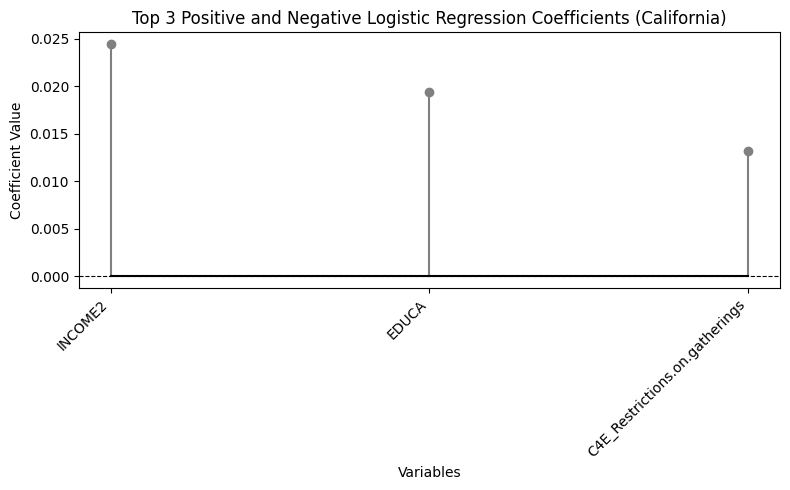

In [10]:
# Sort coefficients into positive and negative influences
sorted_positive = sorted([item for item in coef_dict.items() if item[1] > 0], key=lambda x: x[1], reverse=True)[:3]
sorted_negative = sorted([item for item in coef_dict.items() if item[1] < 0], key=lambda x: x[1])[:3]

# Combine the top 3 positive and top 3 negative influences
top_influences = sorted_positive + sorted_negative
variables, coef_values = zip(*top_influences)

# Create a lollipop chart
plt.figure(figsize=(8, 5))
plt.stem(range(len(variables)), coef_values, linefmt='grey', markerfmt='o', basefmt='black')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.xticks(range(len(variables)), variables, rotation=45, ha='right')
plt.title('Top 3 Positive and Negative Logistic Regression Coefficients (California)')
plt.xlabel('Variables')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.savefig("lollipop_chart_top3_california.png")
plt.show()